In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imread
from sklearn.model_selection import train_test_split
import keras
from tensorflow.keras.models import Sequential
from keras.applications import MobileNetV2
from keras.layers import Dense
from tensorflow.keras.preprocessing import image
import pandas as pd
import numpy as np
import os

In [2]:
brain_df = pd.read_csv('/content/Brain Tumor.csv',usecols=[0,1])
brain_df.head()

,Image,Class
0,Image1,0
1,Image2,0
2,Image3,1
3,Image4,1
4,Image5,0


In [3]:
brain_df.isna().sum()

,0
Image,0
Class,0


In [4]:
brain_df['Class'].value_counts()

,count
Class,
0,2079
1,1683


<Axes: ylabel='count'>

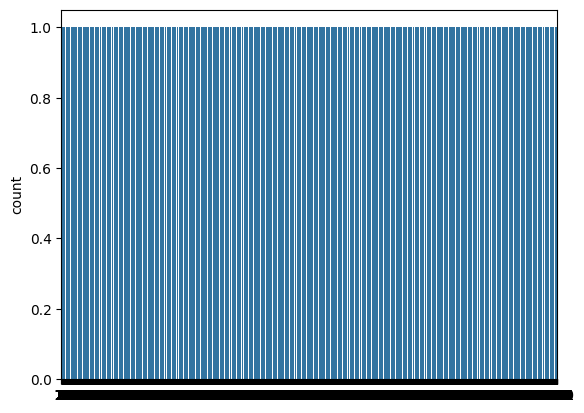

In [5]:
sns.countplot(brain_df['Class'])

In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/Brain Scans.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
path_list = []
base_path = '/content/drive/MyDrive/Brain Tumor'
for entry in os.listdir(base_path):
    path_list.append( os.path.join(base_path,entry))

In [8]:
pathes_dict={os.path.splitext(os.path.basename(x))[0]: x for x in path_list}
brain_df['pathes'] = brain_df['Image'].map(pathes_dict.get)

In [9]:
brain_df.head()

,Image,Class,pathes
0,Image1,0,/content/drive/MyDrive/Brain Tumor/Image1.jpg
1,Image2,0,/content/drive/MyDrive/Brain Tumor/Image2.jpg
2,Image3,1,/content/drive/MyDrive/Brain Tumor/Image3.jpg
3,Image4,1,/content/drive/MyDrive/Brain Tumor/Image4.jpg
4,Image5,0,/content/drive/MyDrive/Brain Tumor/Image5.jpg


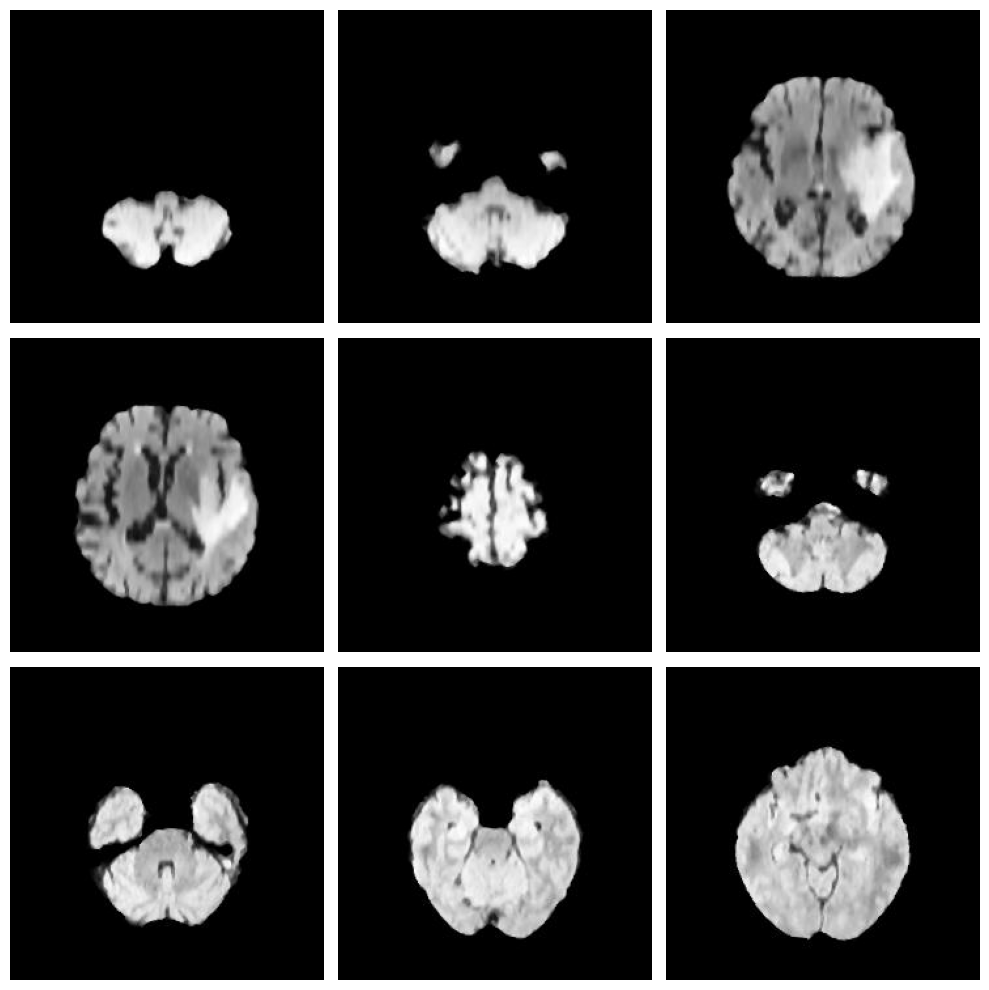

In [10]:
#for x in range (0 ,9):
 #   img = imread(brain_df['pathes'][x])
  #  plt.imshow(img)
   # plt.subplot(3,3,x+1)

import matplotlib.pyplot as plt
from matplotlib.image import imread

plt.figure(figsize=(10, 10))  # Adjust figure size for better spacing

for x in range(9):
    plt.subplot(3, 3, x + 1)           # Create a 3x3 grid
    img = imread(brain_df['pathes'][x]) # Read image
    plt.imshow(img)
    plt.axis('off')                     # Hide axes for cleaner display

plt.tight_layout()                      # Adjust spacing between subplots
plt.show()

In [11]:
from PIL.Image import open
brain_df['pixels']=brain_df['pathes'].map(lambda x:np.asarray(open(x).resize((224,224))))

In [ ]:
brain_df.head()

,Image,Class,pathes,pixels
0,Image1,0,/content/drive/MyDrive/Brain Tumor/Image1.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,Image2,0,/content/drive/MyDrive/Brain Tumor/Image2.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,Image3,1,/content/drive/MyDrive/Brain Tumor/Image3.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,Image4,1,/content/drive/MyDrive/Brain Tumor/Image4.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,Image5,0,/content/drive/MyDrive/Brain Tumor/Image5.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [ ]:
image_list = []
for i in range(0,len(brain_df)):
    # load image
    brain_img = brain_df['pixels'][i].astype(np.float32)
    img_array = image.img_to_array(brain_img)
     # append to list of all images
    image_list.append(keras.applications.mobilenet_v2.preprocess_input(img_array))

# convert image list to single array
# Our feature
X = np.array(image_list)

# print shape of X
print(X.shape)

(3762, 224, 224, 3)


In [ ]:
y = np.array(brain_df.Class)

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y
                                                 ,test_size=0.2
                                                ,random_state=0)


print('The shape of the X_train :'+' '+str(X_train.shape))
print('The size of the X_train :'+' '+str(X_train.shape[0]))
print('The shape of the X_test :'+' '+str(X_test.shape))
print('The size of the X_test:'+' '+str(X_test.shape[0]))

The shape of the X_train : (3009, 224, 224, 3)
The size of the X_train : 3009
The shape of the X_test : (753, 224, 224, 3)
The size of the X_test: 753


In [ ]:
num_classes = 1
model = Sequential()
model.add(MobileNetV2(input_shape=(224, 224, 3),weights="imagenet"
                             ,include_top=False))
model.add(keras.layers.GlobalAveragePooling2D())
model.add( Dense(num_classes, activation='sigmoid',name='preds'))
model.layers[0].trainable= False
# show model summary
model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ preds (Dense)                   │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
model.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])


# mock-train the model
model.fit(
    X_train,
    y_train,
    epochs=5,
    verbose=1,
    validation_data=(X_test, y_test)
)
model.save("model_brain.h5")
print("Saved model to disk")

Epoch 1/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 167s 2s/step - accuracy: 0.6993 - loss: 0.9161 - val_accuracy: 0.8287 - val_loss: 0.7491
Epoch 2/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.8406 - loss: 0.7527 - val_accuracy: 0.8420 - val_loss: 0.7235
Epoch 3/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 167s 2s/step - accuracy: 0.8680 - loss: 0.7281 - val_accuracy: 0.8526 - val_loss: 0.7070
Epoch 4/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.8664 - loss: 0.7236 - val_accuracy: 0.8606 - val_loss: 0.6972
Epoch 5/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 212s 2s/step - accuracy: 0.8787 - loss: 0.7005 - val_accuracy: 0.8632 - val_loss: 0.6886


Saved model to disk


In [ ]:
pretrained_cnn = keras.models.load_model('./model_brain.h5')

# evaluate model on holdout set
eval_score = pretrained_cnn.evaluate(X_test,y_test)
# print loss score
print('Eval loss:',eval_score[0])
# print accuracy score
print('Eval accuracy:',eval_score[1] )

24/24 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.8651 - loss: 0.6817
Eval loss: 0.6886256337165833
Eval accuracy: 0.863213837146759


In [ ]:
y_pred = (pretrained_cnn.predict(X_test) > 0.5).astype("int32")

24/24 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
target_classes = ['No Tumor','Tumor']
classification_report(y_test , y_pred , output_dict = True
                      , target_names=target_classes)

{'No Tumor': {'precision': 0.8477751756440282,
  'recall': 0.905,
  'f1-score': 0.875453446191052,
  'support': 400.0},
 'Tumor': {'precision': 0.8834355828220859,
  'recall': 0.8158640226628895,
  'f1-score': 0.8483063328424153,
  'support': 353.0},
 'accuracy': 0.8632138114209827,
 'macro avg': {'precision': 0.865605379233057,
  'recall': 0.8604320113314448,
  'f1-score': 0.8618798895167337,
  'support': 753.0},
 'weighted avg': {'precision': 0.8644924714393194,
  'recall': 0.8632138114209827,
  'f1-score': 0.8627271101856487,
  'support': 753.0}}

In [ ]:
confusion_matrix(y_test , y_pred )

array([[362,  38],
       [ 65, 288]])